In [1]:
import numpy as np
import math

#1a


In [2]:
#inverse codes used from repository
def stanford(endeffector_position,lengthsoflinks):
    #innverse kinematics
    theta1 = np.arctan(endeffector_position[1]/endeffector_position[0])
    r = np.sqrt(endeffector_position[0]**2 + endeffector_position[1]**2)
    s = endeffector_position[2] - lengthsoflinks[0]
    theta2 = np.arctan(s/r)
    d3 = np.sqrt(r**2 + s**2) - lengthsoflinks[1]
    print("Stanford inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Extension= ", d3, "m\n")
    #return [theta1,theta2,extension]
    #forward kinematics
    x=(lengthsoflinks[1]+d3)*math.cos(theta1)*math.cos(theta2)
    y=(lengthsoflinks[1]+d3)*math.sin(theta1)*math.cos(theta2)
    z=lengthsoflinks[0]+(lengthsoflinks[1]+d3)*math.sin(theta2)
    print("Stanford forward: \n", "X = ", x, "m\n Y =", y,"m\n Z= ", z, "m\n")

def scara(endeffector_position,lengthsoflinks):
    #inverse Kinematics
    r = abs((endeffector_position[0]**2+endeffector_position[1]**2-lengthsoflinks[0]**2-lengthsoflinks[1]**2)/(2*lengthsoflinks[0]*lengthsoflinks[1]))
    theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta1 = np.arctan(endeffector_position[1]/endeffector_position[0]) - np.arctan((lengthsoflinks[1]*np.sin(theta2))/(lengthsoflinks[0]+lengthsoflinks[1]*np.cos(theta2)))
    d3 = lengthsoflinks[0]-endeffector_position[2]
    # converting from radians to degrees
    print("Scara Inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Extension: ", d3, "m\n")
    #return [theta1,theta2,Extension]
    #forward kinematics
    x=lengthsoflinks[0]*math.cos(theta1)+lengthsoflinks[1]*math.cos(theta1+theta2)
    y=lengthsoflinks[0]*math.sin(theta1)+lengthsoflinks[1]*math.sin(theta1+theta2)
    z=lengthsoflinks[2]-d3
    print("Scara forward: \n", "X = ", x, "m\n Y =", y,"m\n Z= ", z, "m\n")
    
def puma(endeffector_position,lengthsoflinks):
    #Inverse kinematics
    theta1 = math.atan2(endeffector_position[1],endeffector_position[0])
    D = (endeffector_position[0]**2+endeffector_position[1]**2+(endeffector_position[2]-lengthsoflinks[0])**2-lengthsoflinks[1]**2-lengthsoflinks[2]**2)/(2*lengthsoflinks[1]*lengthsoflinks[2])
    if D>=1 or D<=-1:
      print("singular configuration")
      if D>1 or D<-1:
          print("outside workspace")
    else:
      theta3 = math.atan2((-math.sqrt(1-D*D)),D)
      theta2 = math.atan2(endeffector_position[2]-lengthsoflinks[0],(math.sqrt(endeffector_position[0]**2+endeffector_position[1]**2)))-math.atan2((lengthsoflinks[2]*math.sin(theta3)),(lengthsoflinks[1]+lengthsoflinks[2]*math.cos(theta3)))
      print("puma Inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Theta3: ", theta3, "rad\n")
      #return [theta1,theta2,theta3]

      #forward kinematics
      x=(lengthsoflinks[1]*math.cos(theta2)+lengthsoflinks[2]*math.cos(theta2+theta3))*math.cos(theta1)
      y=(lengthsoflinks[1]*math.cos(theta2)+lengthsoflinks[2]*math.cos(theta2+theta3))*math.sin(theta1)
      z=lengthsoflinks[0]+lengthsoflinks[1]*math.sin(theta2)+lengthsoflinks[2]*math.sin(theta2+theta3)
      print("puma forward: \n", "X = ", x, "m\n Y =", y,"m\n Z= ", z, "m\n")

#inputs
stanford([0.45, 0.075, 0.1],[0.25,0.25])
scara([0.45, 0.075, 0.1],[0.25,0.25,0.25])
puma([0.45, 0.075, 0.1],[0.25,0.25,0.25])

Stanford inverse: 
 Theta1 =  0.16514867741462683 rad
 Theta2 = -0.3176631929822606 rad
 Extension=  0.23023431780746362 m

Stanford forward: 
 X =  0.44999999999999996 m
 Y = 0.07499999999999997 m
 Z=  0.1 m

Scara Inverse: 
 Theta1 =  -0.256502576982114 rad
 Theta2 = 0.8433025087934816 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.45 m
 Y = 0.075 m
 Z=  0.1 m

puma Inverse: 
 Theta1 =  0.16514867741462683 rad
 Theta2 = -0.035547613118469545 rad
 Theta3:  -0.564231159727582 rad

puma forward: 
 X =  0.45000000000000007 m
 Y = 0.075 m
 Z=  0.1 m



#1b

In [3]:
#inverse codes used from repository
def inverse_Kinematics(A,B,C,D,type):
  lengthsoflinks=[0.25,0.25,0.25]
  endeffector_position=[A,B,C,D]

  if(type=='scara'):
    for i in range(0,4):
      #inverse Kinematics
      r = abs((endeffector_position[i][0]**2+endeffector_position[i][1]**2-lengthsoflinks[0]**2-lengthsoflinks[1]**2)/(2*lengthsoflinks[0]*lengthsoflinks[1]))
      theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
      theta1 = np.arctan(endeffector_position[i][1]/endeffector_position[i][0]) - np.arctan((lengthsoflinks[1]*np.sin(theta2))/(lengthsoflinks[0]+lengthsoflinks[1]*np.cos(theta2)))
      d3 = lengthsoflinks[0]-endeffector_position[i][2]
      # converting from radians to degrees
      print("Scara Inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Extension: ", d3, "m\n")
      #return [theta1,theta2,Extension]
      #forward kinematics
      x=lengthsoflinks[0]*math.cos(theta1)+lengthsoflinks[1]*math.cos(theta1+theta2)
      y=lengthsoflinks[0]*math.sin(theta1)+lengthsoflinks[1]*math.sin(theta1+theta2)
      z=lengthsoflinks[2]-d3
      print("Scara forward: \n", "X = ", x, "m\n Y =", y,"m\n Z= ", z, "m\n")


  if(type=='puma'):
    for i in range(0,4):
      #Inverse kinematics
      theta1 = math.atan2(endeffector_position[i][1],endeffector_position[i][0])
      D = (endeffector_position[i][0]**2+endeffector_position[i][1]**2+(endeffector_position[i][2]-lengthsoflinks[0])**2-lengthsoflinks[1]**2-lengthsoflinks[2]**2)/(2*lengthsoflinks[1]*lengthsoflinks[2])
      if D>=1 or D<=-1:
        print("singular configuration")
        if D>1 or D<-1:
          print("outside workspace")
      else:
        theta3 = math.atan2((-math.sqrt(1-D*D)),D)
        theta2 = math.atan2(endeffector_position[i][2]-lengthsoflinks[0],(math.sqrt(endeffector_position[i][0]**2+endeffector_position[i][1]**2)))-math.atan2((lengthsoflinks[2]*math.sin(theta3)),(lengthsoflinks[1]+lengthsoflinks[2]*math.cos(theta3)))
        print("puma Inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Theta3: ", theta3, "rad\n")
        #return [theta1,theta2,theta3]

        #forward kinematics
        x=(lengthsoflinks[1]*math.cos(theta2)+lengthsoflinks[2]*math.cos(theta2+theta3))*math.cos(theta1)
        y=(lengthsoflinks[1]*math.cos(theta2)+lengthsoflinks[2]*math.cos(theta2+theta3))*math.sin(theta1)
        z=lengthsoflinks[0]+lengthsoflinks[1]*math.sin(theta2)+lengthsoflinks[2]*math.sin(theta2+theta3)
        print("puma forward: \n", "X = ", x, "m\n Y =", y,"m\n Z= ", z, "m\n")

  if(type=='stanford'):
    for i in range(0,4):
      #innverse kinematics
      theta1 = np.arctan(endeffector_position[i][1]/endeffector_position[i][0])
      r = np.sqrt(endeffector_position[i][0]**2 + endeffector_position[i][1]**2)
      s = endeffector_position[i][2] - lengthsoflinks[0]
      theta2 = np.arctan(s/r)
      d3 = np.sqrt(r**2 + s**2) - lengthsoflinks[1]
      print("Stanford inverse: \n", "Theta1 = ", theta1, "rad\n Theta2 =", theta2,"rad\n Extension= ", d3, "m\n")
      #return [theta1,theta2,extension]
      #forward kinematics
      x=(lengthsoflinks[1]+d3)*math.cos(theta1)*math.cos(theta2)
      y=(lengthsoflinks[1]+d3)*math.sin(theta1)*math.cos(theta2)
      z=lengthsoflinks[0]+(lengthsoflinks[1]+d3)*math.sin(theta2)
      print("Stanford forward: \n", "X = ", x,2, "m\n Y =", y,3,"m\n Z= ", z, "m\n")


inverse_Kinematics([0.45, 0.075, 0.1],[0.45, -0.075, 0.1],[0.25, -0.075, 0.1],[0.25, 0.075, 0.1],'stanford') #mention type as scara or puma or stanford
inverse_Kinematics([0.45, 0.075, 0.1],[0.45, -0.075, 0.1],[0.25, -0.075, 0.1],[0.25, 0.075, 0.1],'scara')
inverse_Kinematics([0.45, 0.075, 0.1],[0.45, -0.075, 0.1],[0.25, -0.075, 0.1],[0.25, 0.075, 0.1],'puma')

Stanford inverse: 
 Theta1 =  0.16514867741462683 rad
 Theta2 = -0.3176631929822606 rad
 Extension=  0.23023431780746362 m

Stanford forward: 
 X =  0.44999999999999996 2 m
 Y = 0.07499999999999997 3 m
 Z=  0.1 m

Stanford inverse: 
 Theta1 =  -0.16514867741462683 rad
 Theta2 = -0.3176631929822606 rad
 Extension=  0.23023431780746362 m

Stanford forward: 
 X =  0.44999999999999996 2 m
 Y = -0.07499999999999997 3 m
 Z=  0.1 m

Stanford inverse: 
 Theta1 =  -0.2914567944778671 rad
 Theta2 = -0.5216056136891403 rad
 Extension=  0.051039864469807406 m

Stanford forward: 
 X =  0.25000000000000006 2 m
 Y = -0.07500000000000001 3 m
 Z=  0.1 m

Stanford inverse: 
 Theta1 =  0.2914567944778671 rad
 Theta2 = -0.5216056136891403 rad
 Extension=  0.051039864469807406 m

Stanford forward: 
 X =  0.25000000000000006 2 m
 Y = 0.07500000000000001 3 m
 Z=  0.1 m

Scara Inverse: 
 Theta1 =  -0.256502576982114 rad
 Theta2 = 0.8433025087934816 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.45 m
 Y = 0.

#1c
5cm X 5cm square

In [4]:
#mention type as scara or puma or stanford

inverse_Kinematics([0.40, 0.06, 0.1],[0.40, 0.01, 0.1],[0.35, 0.01, 0.1],[0.35, 0.06, 0.1],'scara') 
inverse_Kinematics([0.40, 0.06, 0.1],[0.40, 0.01, 0.1],[0.35, 0.01, 0.1],[0.35, 0.06, 0.1],'puma')
inverse_Kinematics([0.40, 0.06, 0.1],[0.40, 0.01, 0.1],[0.35, 0.01, 0.1],[0.35, 0.06, 0.1],'stanford')

Scara Inverse: 
 Theta1 =  -0.4795426595751926 rad
 Theta2 = 1.2568652143693797 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.4 m
 Y = 0.06 m
 Z=  0.1 m

Scara Inverse: 
 Theta1 =  -0.6180895978105604 rad
 Theta2 = 1.2861687828589612 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.4 m
 Y = 0.010000000000000009 m
 Z=  0.1 m

Scara Inverse: 
 Theta1 =  -0.7472339156368221 rad
 Theta2 = 1.5515951469511642 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.3567857688147206 m
 Y = 0.010193879108992027 m
 Z=  0.1 m

Scara Inverse: 
 Theta1 =  -0.6112198326377974 rad
 Theta2 = 1.5619962132122718 rad
 Extension:  0.15 m

Scara forward: 
 X =  0.35 m
 Y = 0.06 m
 Z=  0.1 m

puma Inverse: 
 Theta1 =  0.14888994760949723 rad
 Theta2 = 0.1749129587876629 rad
 Theta3:  -1.0600826270863724 rad

puma forward: 
 X =  0.39999999999999997 m
 Y = 0.05999999999999999 m
 Z=  0.10000000000000003 m

puma Inverse: 
 Theta1 =  0.02499479361892016 rad
 Theta2 = 0.18728199258035144 rad
 Theta3:  -1.09189993460

#3b



In [5]:
import pandas as pd
import io
import csv
from google.colab import files
print("choose Gait_DATA.xlsx file\n")
uploaded = files.upload()
#upload the excel file by clicking the Choose file button

choose Gait_DATA.xlsx file



Saving Gait_DATA.xlsx to Gait_DATA.xlsx


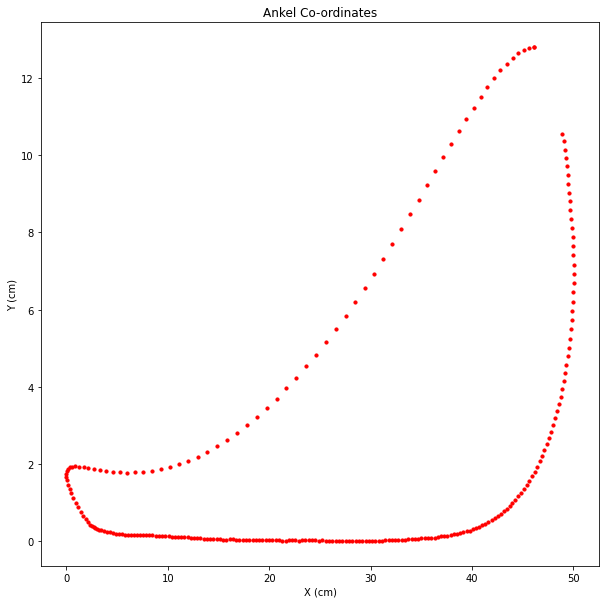

In [6]:
from pandas import read_excel
import pandas as pd
import matplotlib.pyplot as plt
my_sheet = 'Sheet1' # change it to your sheet name
file_name = 'Gait_DATA.xlsx' # name of excel file
df = read_excel(file_name, sheet_name = my_sheet)

x = list(df['X (cm)'])
y = list(df['Y (cm)'])

plt.figure(figsize=(10,10))
plt.scatter(x,y,marker="o",s=10,c="red")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
plt.title("Ankel Co-ordinates")
plt.show()

#3C

#4b